In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as np
import numpy as np

from scipy.stats import chi2_contingency 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


In [82]:
train=pd.read_csv('Datasets/Train.csv')
test=pd.read_csv('datasets/test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
print(train.shape, test.shape)

(18506, 21) (6169, 20)


In [12]:
train.head(2)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost


In [13]:
test.head(2)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes


In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

In [107]:
full=pd.concat(objs=[train, test], axis=0)
full.shape

<IPython.core.display.Javascript object>

(24675, 21)

In [19]:
full.duplicated().sum()

0

In [20]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24675 entries, 0 to 6168
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                24675 non-null  object 
 1   country                24675 non-null  object 
 2   age_group              24675 non-null  object 
 3   travel_with            23239 non-null  object 
 4   total_female           24671 non-null  float64
 5   total_male             24668 non-null  float64
 6   purpose                24675 non-null  object 
 7   main_activity          24675 non-null  object 
 8   info_source            24675 non-null  object 
 9   tour_arrangement       24675 non-null  object 
 10  package_transport_int  24675 non-null  object 
 11  package_accomodation   24675 non-null  object 
 12  package_food           24675 non-null  object 
 13  package_transport_tz   24675 non-null  object 
 14  package_sightseeing    24675 non-null  object 
 15  pac

In [58]:
cat=[c for c in full.select_dtypes ('object').columns]
num= [c for c in full.select_dtypes('int64', 'float64').columns]

In [84]:
full.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1436
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category            6169
dtype: int64

In [60]:
full.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,24671.0,0.932796,1.205086,0.0,0.0,1.0,1.0,49.0
total_male,24668.0,1.003446,1.270691,0.0,1.0,1.0,1.0,90.0
night_mainland,24675.0,9.184113,14.719152,0.0,3.0,6.0,11.0,664.0
night_zanzibar,24675.0,2.516596,5.323307,0.0,0.0,0.0,4.0,240.0


In [103]:
full.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1436
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category            6169
dtype: int64

In [145]:
full=pd.concat(objs=[train, test], axis=0)

<IPython.core.display.Javascript object>

In [146]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

def fillna(X, inplace=None):
    for col in X.columns:
        if col != 'cost_category' and X[col].isna().any():
            if X[col].dtype == 'object':
                strategy = 'most_frequent'
                pipe = make_pipeline(SimpleImputer(strategy=strategy))
            else:
                strategy= 'median'
                pipe = make_pipeline(SimpleImputer(strategy=strategy ))
            X[col] = pipe.fit_transform(X[[col]])
            
            if not inplace:
                return print("DataFrame not updated.")
            else:
                print(f"Missing Values in '{col}' column have been filled with the {strategy} value.")
                
    if inplace:
        return None

In [148]:
fillna(full, inplace=True)

Missing Values in 'total_female' column have been filled with the median value.
Missing Values in 'total_male' column have been filled with the median value.


In [149]:
full.isnull().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category            6169
dtype: int64

In [151]:
for col in full.select_dtypes('object'):
    print(col, len(full[col].unique()))

Tour_ID 24675
country 141
age_group 5
travel_with 5
purpose 8
main_activity 10
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
first_trip_tz 2
cost_category 7


In [167]:
def chi_test(data, target):
    for col in data.columns:
        ct=pd.crosstab(target, data[col])
        chi2, p, dof, expected = chi2_contingency(ct)
        
    print(f"{col}\nChi Test: {chi2}\nP_Value: {p}\nDOF: {dof}\n------------")

In [168]:
X=full.drop('cost_category', axis=1)
y=full['cost_category']

In [169]:
chi_test(X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

first_trip_tz
Chi Test: .2f 2229.180451768042
P_Value: 0.0
DOF: 5
------------


In [170]:
def trial(data, target):
    for col in data.columns:
        ct=pd.crosstab(target, data[col])
        sns.heatmap(ct)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

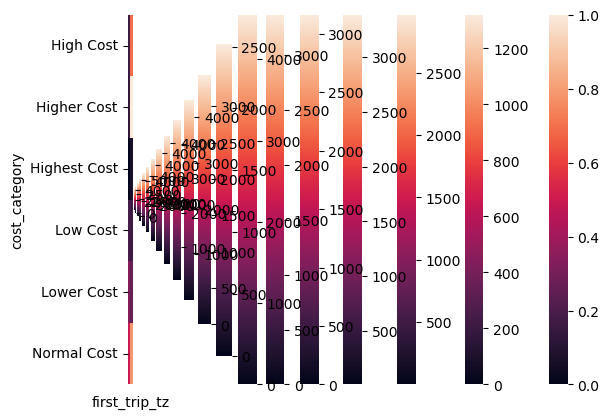

In [171]:
trial(X, y)